<a href="https://colab.research.google.com/github/nicolasAT08/MineriadeDatos/blob/main/TallerAgrupacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>MINERIA DE DATOS</h1>
<strong>Taller Agrupación</strong><br />
PROFESORA ELIZABETH LEON GUZMAN <br />
<strong>TEMA</strong> Distancias, Algoritmos de Agrupación</center>

-------
Práctica correspondiente a Agrupación (modelamiento no supervisado) usando diferentes distancias y similitudes para los algoritmos:

* K-means
* Hierarchical clustering
--------

**PRESENTADO POR:** *Nicolás Aranguren T.*

# Distancias

Dados los ejemplos numéricos A={1,0,2,5,3} y B={2,1,0,3,-1}, encontrar:

a) La distancia euclideana

b) La distancia city-block

c) La distancia Minkowski para p=3

In [1]:
from sklearn.metrics.pairwise import euclidean_distances,cosine_distances
from scipy.spatial.distance import cityblock, minkowski, euclidean, cosine, chebyshev
from scipy.spatial import distance
from scipy import stats

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import pandas as pd

#Carga de datos:
A = [[1,0,2,5, 3]]
B = [[2,1,0,3,-1]]

# Calculamos la similitud entre cada punto del dataset
distancias = [[euclidean(A,B), cityblock(A,B), minkowski(A,B, p=3)]]
d = pd.DataFrame(distancias,columns=['euclideana','cityblock','minkowski'])
d

,euclideana,cityblock,minkowski
0,5.09902,10,4.344481


##**Ejercicio 1**
1. Calcular la distancia coseno, correlacion y chevishev
2. ¿Qué puede decir de los resultados de las diferentes distancias? Incluyendo las incluidas en el ejemplo
***RESPUESTA:*** las tres primeras medidas mostradas en el ejemplo y Chevishev hacen refenrecia a distancias, por lo tanto su análisis y compresión se deben en en términos espaciales propiamente dichos.

Por otra parte las medidas coseno y correlacion miden la similitud, por lotanto se debe conocer la escala que manejan. En el caso de la similitud de coseno y correlación es $[0,1]$.

In [2]:
from scipy.spatial.distance import cosine, correlation, chebyshev

dist = [[cosine(A,B), correlation(A,B), chebyshev(A,B)]]
d1 = pd.DataFrame(dist, columns=['coseno','correlación', 'chevishev'])
d1

,coseno,correlación,chevishev
0,0.421171,0.753402,4


##**Ejercicio 2** 

Dado los ejemplos categóricos C={A,B,A,B,A,A} y D={B,B,A,B,B,A}, encontrar:

a) La similaridad usando SMC (Simple matching coefficient)

b) La similaridad usando Jaccard

c) La similaridad usando el Coeficiente de Rao

**COMPROBACIÓN EN EXCEL Y PYTHON**

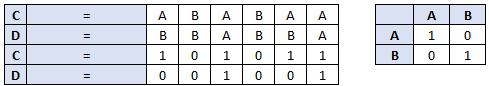

a)

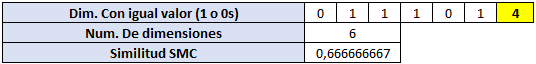

b)

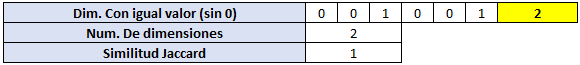

c)

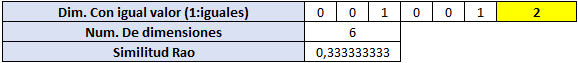

In [3]:
from scipy.spatial.distance import jaccard, russellrao, euclidean

C = [[1,0,1,0,1,1]]
D = [[0,0,1,0,0,1]]

def binarize(X,Y=None):
    ''' Force binary representation of the matrix, according to X>median(X) '''
    if Y==None:
        X = np.matrix(X)
        Xmedians = np.ones((np.shape(X)[0],1)) * np.median(X,0)
        Xflags = X>Xmedians
        X[Xflags] = 1; X[~Xflags] = 0
        return X
    else:
        X = np.matrix(X); Y = np.matrix(Y);
        XYmedian= np.median(np.bmat('X; Y'),0)
        Xmedians = np.ones((np.shape(X)[0],1)) * XYmedian
        Xflags = X>Xmedians
        X[Xflags] = 1; X[~Xflags] = 0
        Ymedians = np.ones((np.shape(Y)[0],1)) * XYmedian
        Yflags = Y>Ymedians
        Y[Yflags] = 1; Y[~Yflags] = 0
        return [X,Y]

In [4]:
X = C
Y = D
N1, M = np.shape(X)
N2, M = np.shape(Y)
X,Y = binarize(X,Y);
sim = ((X*Y.T)+((1-X)*(1-Y).T))/M
sim

matrix([[0.66666667]])

In [5]:
distancias = [[jaccard(C,D),russellrao(C,D),sim ]] ##, correlation(A,B), chebyshev(A,B)]]
d3 = pd.DataFrame(distancias,columns=['Jaccard','RussellRao','smc'])   #,'Correlacion','Chebyshev'])
d3

,Jaccard,RussellRao,smc
0,0.5,0.666667,[[[[[0.66666667]]]]]


# K-means

##**Ejercicio 3**

Usar el algoritmo k-means y distancia Euclidean para agrupar los siguientes puntos en 3

grupos: A1=(2,10), A2=(2,5), A3=(8,4), A4=(5,8), A5=(7,5), A6=(6,4), A7=(1,2), A8=(4,9). Asumir los centroides iniciales: A1, A4 and A7.

a) Correr una iteración y mostrar: <br />

> 1) Los nuevos grupos <br />

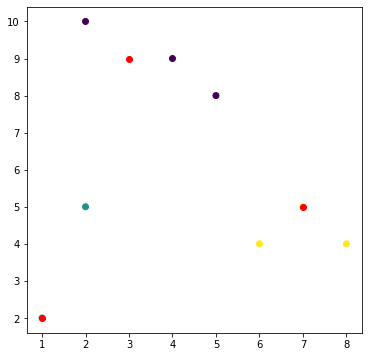

> 2) Los nuevos centroides <br />

**RESPUESTA:** los nue(1,2) , (6,4), (7,4)

b) Iterar más. ¿Cuantas iteraciones se necesita para converger? <br />

**RESPUESTA:** se rqequieren 3 iteraciones para converger.

c) Mostrar gráficamente (los puntos y centroides) al converger: <br />

> 1) grupos finales <br />

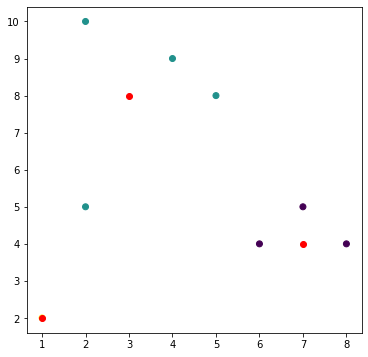

> 2) centroides finales <br /> 

**RESPUESTA:** CENTROIDES (1,2) , (3,8) , (7,4)

In [52]:
from sklearn.cluster import KMeans
import numpy as np

Centroid_init = np.array([[2,10],[5,8],[1,2]])
#print(Centroid_init)
points = np.array([[2,10], [2,5], [8,4], [5,8], [7,5], [6,4], [1,2], [4,9]])
#kmeans = KMeans(n_clusters=3,init=Centroid_init, random_state=i,n_init=1).fit(points)
#print(kmeans.cluster_centers_)
all_clusters,all_preds=simple_kmeans(points,3)

In [15]:
# Definición de una funcion del simplekmeans para ver por iteraciones
from sklearn.metrics.pairwise import euclidean_distances
def simple_kmeans(X,k, iter=100):
    # Inicializacion de los primeros centroides
    init_clus=np.random.choice(np.arange(points.shape[0]),replace=False, size=k)
    #print(init_clus)
    clusters=X[init_clus]
    preds=np.argmin(euclidean_distances(points,clusters),axis=1)
    all_clusters=[clusters.copy()]
    all_preds=[preds]
    for i in range(iter):
        for clus in range(k):
            clusters[clus]=X[preds==clus].mean(axis=0)
            all_clusters.append(clusters.copy())
            preds=np.argmin(euclidean_distances(points,clusters),axis=1)
            all_preds.append(preds.copy())
    return all_clusters,all_preds

all_clusters,all_preds=simple_kmeans(points,5)

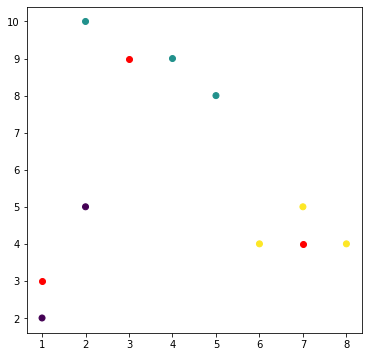

In [53]:
iteration=5 #@param {type:"slider", min:0, max:5, step:1}
plt.figure(figsize=(6,6))
plt.scatter(points[:,0],points[:,1],c=all_preds[iteration])
plt.scatter(all_clusters[iteration][:,0],all_clusters[iteration][:,1],c="r")

# Determinar el número de k
La distancia intra-cluster mide qué tan compacto es cada cluster, ecisten varias medidas intra-cluster, una de ellas se define como:



$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

k-means minimiza esta medida, y se utiliza para medir la calidad del cluster. El método consiste en  ejecutar varias veces el k-means con diferentes valores de k,  y graficar el valor de la inercia para cda k. La grafica resultante es una curva que desciende (a myor número de grupos menor la inercia). En esta gráfica se busca un valor de k tan pequeño como sea posible y que tenga un valor de la métrica bajo. A este tipo de gráfica se le conoce usualmente como gráfica de codo o *elbow*:

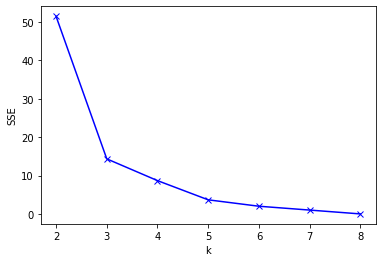

In [17]:
points = np.array([[2,10], [2,5], [8,4], [5,8], [7,5], [6,4], [1,2], [4,9]])

Sum_of_squared_distances = []
K = range(2,9)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()



##**Ejercicios: 4, 5 y 6**

**4.**  Calcular la gráfica del codo para el ejemplo 1 (calificaciones de películas)

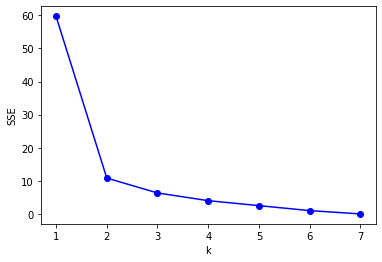

**5.** Entrenar un modelo K-means con un conjunto de datos en dos dimensiones, realice una exploración del parámetro $K$. Seleccione un valor apropiado (utilizando el método del codo y argumente su decisión.

***RESPUESTA:*** luego de agregar algunos datos de entrenamiento al modelo de clustering de películas, se se sigiere un valor $k=3$, siendo este el valor donde se empieza a reducir más simétricamente SSE.

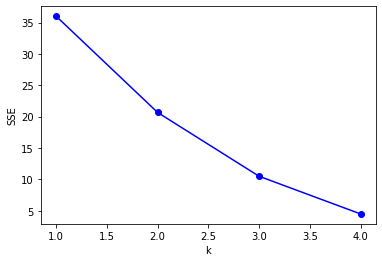

**6.** Aplicar el algoritmo k-means al conjunto de datos Iris (sin la clase), para k=2,3,4,5,6,7,8. Dibujar la gáfica de Elbow(codo) basada en el SSE. Explique los resultados.

**RESPUESTA:** se sabe con anticipación que las clases son tres (setosa, versicolor y virginica), por lo tanto el valor de $k$ debería ser $3$. Sin embargo, valores mayores a tres muestran un SSE menor y esto se debe a que en el conjunto de datos axisten sobrelapes entre las especies y el modelo no logra identificar el $3$ específico.

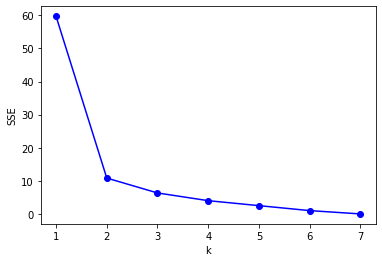

In [18]:
# 4. Calcular la gráfica del codo para el ejemplo 1 (calificaciones de películas)
from sklearn import cluster

titulos = ['usuario','El viaje de Chihiro','Star Wars','The Matrix','Advengers','Malefica']
puntajes = [['juan',1,5,5,4,2],['ana',2,4,5,3,2],['luis',2,4,4,5,3],['jorge',4,2,2,3,5],['maría',5,1,2,3,4],['oscar',4,2,1,4,5],['mariana',3,5,5,5,3]]
movies = pd.DataFrame(puntajes,columns=titulos)
movies
data = movies.drop('usuario',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data) 
labels = k_means.labels_

Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bo-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [19]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,El viaje de Chihiro,Star Wars,The Matrix,Advengers,Malefica
0,4.333333,1.666667,1.666667,3.333333,4.666667
1,2.000000,4.500000,4.750000,4.250000,2.500000


In [20]:
## datos de entrenamiento

testData = np.array([[4,2,5,4,4],[5,1,2,3,4],[4,4,3,3,1],[3,3,2,4,3],[2,5,2,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['santiago','diego','alejandra','tati','yina']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers
data1 = newusers.drop('usuario',axis=1)

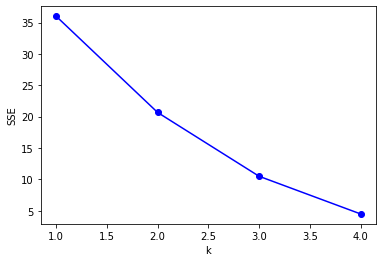

In [21]:
Sum_of_squared_distances1 = []
K1 = range(1,5)
for k in K1:
    km1 = KMeans(n_clusters=k)
    km1 = km1.fit(data1)
    Sum_of_squared_distances1.append(km1.inertia_)
    
plt.plot(K1, Sum_of_squared_distances1, 'bo-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

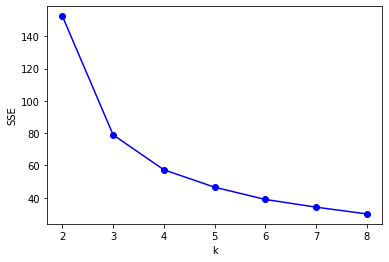

In [23]:
#6. Aplicar el algoritmo k-means al conjunto de datos Iris (sin la clase), para k=2,3,4,5,6,7,8.
#   Dibujar la gáfica de Elbow(codo) basada en el SSE. Explique los resultados.
iris = pd.read_csv("iris.csv")
iris = iris.drop("species", axis=1)

Sum_of_squared_distances = []
K = range(2,9)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(iris)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bo-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

#Hierarchical Clustering



###Ejemplo1
Usaremos un dataset de vertebrados (ejemplo de TAN) usado para clasificación. Se ejecutaran los tres algoritmos clásicos de agrupacion jerarquica aglomerativa: single link (MIN), complete link (MAX), y  group average, usando scipy library de python.



In [25]:
import pandas as pd

data = pd.read_csv('vertebrate.csv',header='infer')
data

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


In [26]:
# importamos las librerías
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Name']
Y = data['Class']
# Se eliminan la columna de nombre y la clase
X = data.drop(['Name','Class'],axis=1)

###Single Link (MIN)

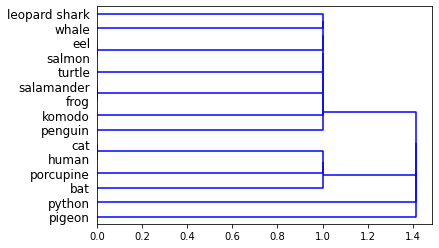

In [27]:
Z = hierarchy.single(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

###Complete Link (MAX)

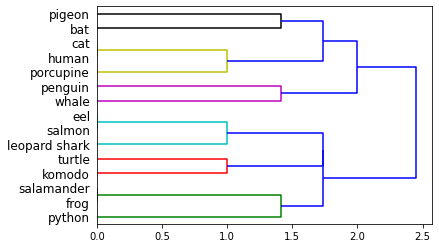

In [28]:
Z = hierarchy.complete(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

###Average - Promedio

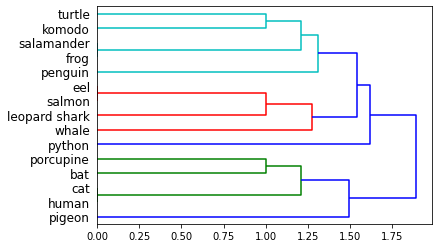

In [29]:
Z = hierarchy.average(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

###Ward

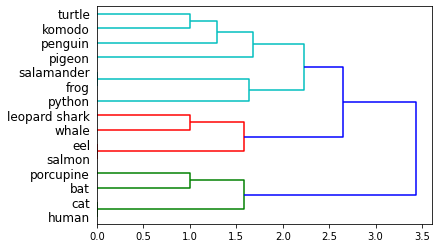

In [30]:
Z = hierarchy.ward(X)
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

##**Ejercicio 1**

¿Qué concluye de los cuatro métodos? con respecto al conjunto de datos usado.

##**Ejercicio 2**

Dado un conjunto de ejemplos categóricos de 5 dimensiones:


In [31]:
from scipy.spatial import distance

X1 = np.array([
              [ 1,0,1,1,0],
              [ 1,1,0,1,0],
              [ 0,0,1,1,0],
              [ 0,1,0,1,0],
              [ 1,0,1,1,0],
              [ 0,1,1,0,0],
             ])

a) Aplique agrupamiento jerárquico aglomerativo, usando:

1) Medida intercluster enlace simple (single link o MIN) basado en el coeficiente de Rao. Diagramar el dendograma

2) Medida intercluster enlace completo (complete link o MAX) basado en coeficiente de corres-pondencia simple CCS (su sigla en inglés, SMC Simple Matching Coeficient). Diagramar el dendograma

b) ¿Es posible usar el método de Ward? Explique.

**RESPUESTA:** Si es posible debido  que este utiliza la suma de cuadrados de las diferencias con respecto al centroide para conformar los clusters.

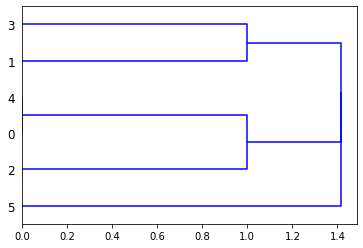

In [32]:
# SINGLE LINK (MIN)

Z1 = hierarchy.single(X1)
dn1 = hierarchy.dendrogram(Z1,orientation='right')

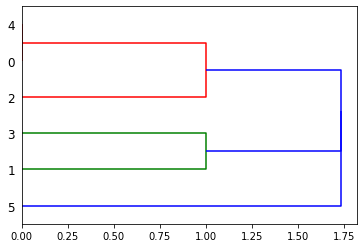

In [33]:
# COMPLETE LINK (MAX)

Z1 = hierarchy.complete(X1)
dn1 = hierarchy.dendrogram(Z1,orientation='right')

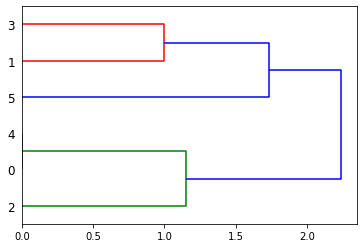

In [34]:
#WARD

Z1 = hierarchy.ward(X1)
dn1 = hierarchy.dendrogram(Z1,orientation='right')

**Ejercicio 3**

Usar el conjunto de datos “Perfume Data Data Set” del repositorio UCI (Machine Learning), para aplicar los algoritmos: single link, complete link, average link y Ward. Mostrar dendogramas y explicar resultados.

In [36]:
import pandas as pd

perf = pd.read_csv('perfume_data.csv', header='infer')
nombres = perf.ajayeb
perf1 = perf.drop('ajayeb', axis=1)
perf1 = perf1.astype(float)

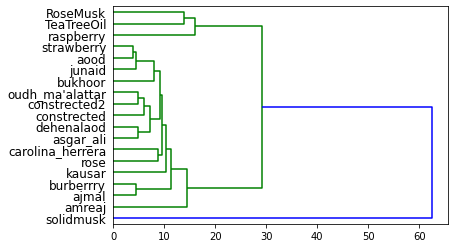

In [37]:
Z2 = hierarchy.single(perf1)
dn2 = hierarchy.dendrogram(Z2,labels=nombres.tolist(),orientation='right')

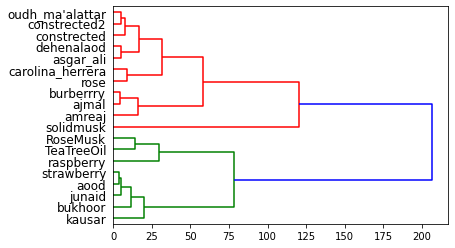

In [38]:
Z2 = hierarchy.complete(perf1)
dn2 = hierarchy.dendrogram(Z2,labels=nombres.tolist(),orientation='right')

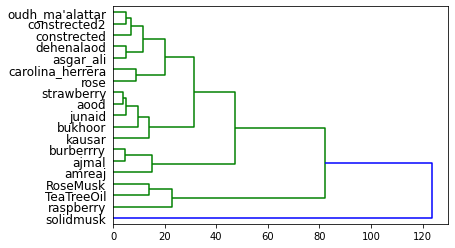

In [39]:
Z2 = hierarchy.average(perf1)
dn2 = hierarchy.dendrogram(Z2,labels=nombres.tolist(),orientation='right')

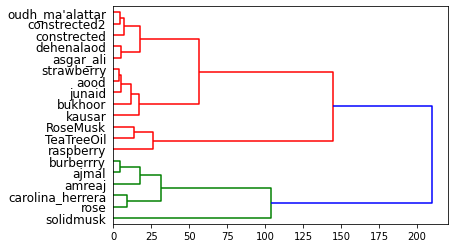

In [40]:
Z2 = hierarchy.ward(perf1)
dn2 = hierarchy.dendrogram(Z2,labels=nombres.tolist(),orientation='right')


##**Ejercicio 3**

Usar el data set creado en la sección "Determinar el número de K" y construya un dendograma con distancia euclidiana (from sklearn.metrics.pairwise import euclidean_distances), y otro con similitud coseno (puede utilizar la función de scikit-learn [cosine similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html)). Discuta los resultados.

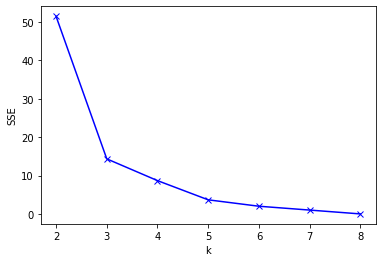

In [41]:
points
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance

Sum_of_squared_distances = []
K = range(2,9)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [42]:
euclidean_distances(points,points)
points

array([[ 2, 10],
       [ 2,  5],
       [ 8,  4],
       [ 5,  8],
       [ 7,  5],
       [ 6,  4],
       [ 1,  2],
       [ 4,  9]])

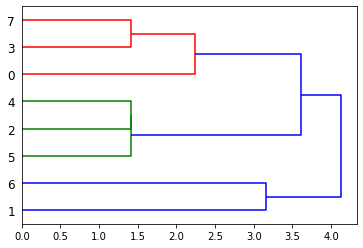

In [43]:
Z3 = hierarchy.single(points)
dn3 = hierarchy.dendrogram(Z3,orientation='right')


# K-Nearest Neighbor

##**Ejercicio 1**

Usar el algoritmo de agrupación K-Nearest Neighbor y distancia Euclidean para agrupar los datos del ejercicio 3. Usar un umbral de 4.